<a href="https://colab.research.google.com/github/alexandre-braga/DCC190/blob/main/DCC190_Trabalho_1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Questão 1 - Difusão ADI

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
import matplotlib as mpl

In [4]:
def TDMASolve(a, b, c, d):
  nmax = len(d)#n em números é linhas

  # Modifica o primeiro coeficiente de cada linha
  c[0] /= b[0] #Risco de divisão por zero.
  d[0] /= b[0]

  for i in range(1, nmax):
    ptemp = b[i] - (a[i] * c[i-1])
    c[i] /= ptemp
    d[i] = (d[i] - a[i] * d[i-1])/ptemp

  #Substituição de volta
  x = [0 for i in range(nmax)]
  x[-1] = d[-1]
  for i in range(-2,-nmax-1,-1):
    x[i] = d[i] - c[i] * x[i+1]
  return x

In [5]:
def exata(eps, t, x, y):
  return np.exp(-2*np.pi*np.pi*t)*np.sin(np.pi*x)*np.sin(np.pi*y)


### Δt = h

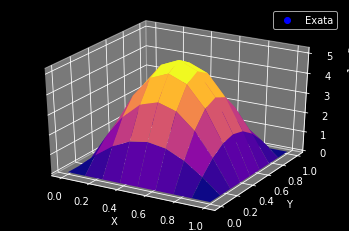

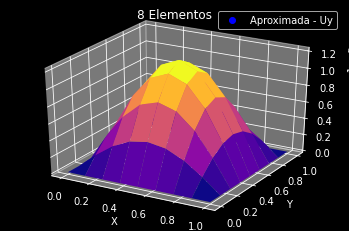

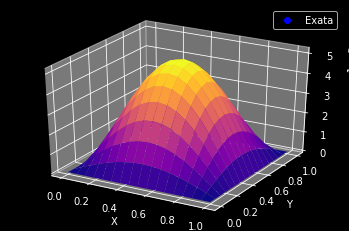

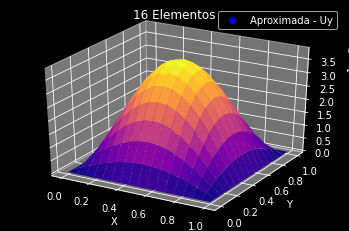

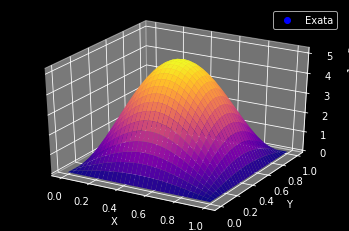

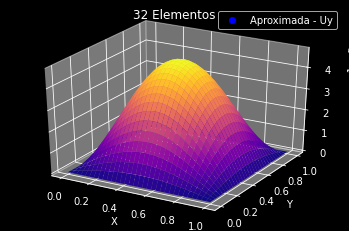

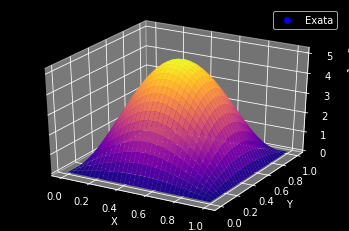

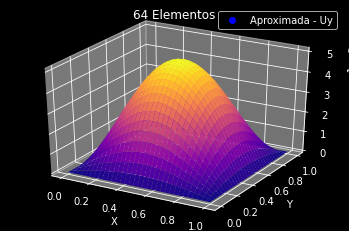

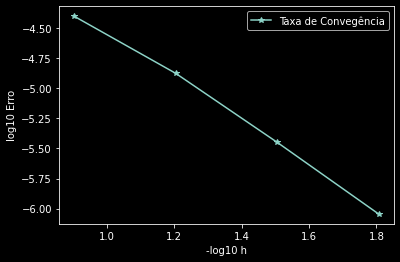

Erro:  [3.95510672e-05 1.32959591e-05 3.55735234e-06 9.04198612e-07]
Taxa de Convergência:  1.8169777031082732


In [6]:
er = 4
erro = np.zeros(er)
refin = np.zeros(er)

for nelAtual in range(er):
  nel = 8*(2**(nelAtual))

  # dominio espacial
  xi = 0
  xf = 1
  # espaçamento entre os elementos
  h = (xf-xi)/nel
  h2 = h*h

  #dominio temporal
  ti = 0
  tf = 0.5
  #espaçamento temporal
  dt = h

  #coeficiente difusivo
  eps = 1

  sigma = eps*dt/h2

  x = np.linspace(xi,xf,nel+1)
  y = np.linspace(xi,xf,nel+1)

  ux = np.zeros((nel+1,nel+1))
  uy = np.zeros((nel+1,nel+1))

  #condicao inicial
  for i in range(0,nel+1):
    for j in range(0,nel+1):
      uy[i,j] = exata(eps,ti,x[i],y[j])

  t = ti
  while(t < tf):

  #### PRIMEIRO PASSO ####
    t = t + dt/2
  #condicoes de contorno de Dirichlet
    ux[0,:] = exata(eps,t,x[0],y[:])
    ux[nel,:] = exata(eps,t,x[nel],y[:])
    ux[:,0] = exata(eps,t,x[:],y[0])
    ux[:,nel] = exata(eps,t,x[:],y[nel])
    for j in range(1,nel):
      #construcao da matriz
      a = - sigma*np.ones(nel-1)/2
      b = (1 + sigma)*np.ones(nel-1)
      c = - sigma*np.ones(nel-1)/2
      # construcao do vetor fonte 
      d = (1 - sigma)*uy[1:nel,j] + sigma/2*(uy[1:nel,j+1] + uy[1:nel,j-1])

      # contribuicao das condicoes de contorno no termo fonte 
      d[0] = d[0] + sigma/2*ux[0,j]
      d[nel-2] = d[nel-2] + sigma/2*ux[nel,j]

      ux[1:nel,j] = TDMASolve(a,b,c,d)

  #### SEGUNDO PASSO ####
    t = t + dt/2
  #condicoes de contorno de Dirichlet
    uy[0,:] = exata(eps,t,x[0],y[:])
    uy[nel,:] = exata(eps,t,x[nel],y[:])
    uy[:,0] = exata(eps,t,x[:],y[0])
    uy[:,nel] = exata(eps,t,x[:],y[nel])
    for i in range(1,nel):
      #construcao da matriz
      a = - sigma*np.ones(nel-1)/2
      b = (1 + sigma)*np.ones(nel-1)
      c = - sigma*np.ones(nel-1)/2
      # construcao do vetor fonte 
      d = (1 - sigma)*ux[i,1:nel] + sigma/2*(ux[i+1,1:nel] + ux[i-1,1:nel])

      # contribuicao das condicoes de contorno no termo fonte 
      d[0] = d[0] + sigma/2*uy[i,0]
      d[nel-2] = d[nel-2] + sigma/2*uy[i,nel]

      uy[i,1:nel] = TDMASolve(a,b,c,d)


  X,Y = np.meshgrid(x,y)
  zs = np.array( exata( eps,t,np.ravel(X), np.ravel(Y) ) )
  ZZ = zs.reshape(Y.shape)

  plt.style.use("dark_background")

  fig1 = plt.figure()
  ax1 = fig1.add_subplot(1,1,1, projection='3d')
  ax1.set_xlabel('X')
  ax1.set_ylabel('Y')
  surf1 = ax1.plot_surface(X, Y, ZZ, cmap = cm.plasma)

  fig2 = plt.figure()
  ax2 = fig2.add_subplot(1,1,1, projection='3d')
  ax2.set_xlabel('X')
  ax2.set_ylabel('Y')
  surf2 = ax2.plot_surface(X, Y, uy, cmap = cm.plasma, label='aproximada')

  fake2Dline = mpl.lines.Line2D([0],[0], linestyle="none", c='b', marker = 'o')
  ax1.legend([fake2Dline], ['Exata'], numpoints = 1)
  ax2.legend([fake2Dline], ['Aproximada - Uy'], numpoints = 1)
  plt.title('%i Elementos' %nel)
  plt.show()

  refin[nelAtual] = h
  erro[nelAtual] = np.max(np.max(np.abs(ZZ - uy)))

plt.plot(-np.log10(refin),np.log10(erro),'-*')
plt.legend(["Taxa de Convegência"])
plt.ylabel("log10 Erro")
plt.xlabel("-log10 h")
plt.show()
print("Erro: ", erro)
print("Taxa de Convergência: ", (np.log10(erro[er-1])-np.log10(erro[0]))/(np.log10(refin[er-1])-np.log10(refin[0])))

### Δ t = $ h^2 $

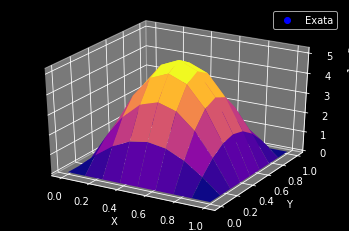

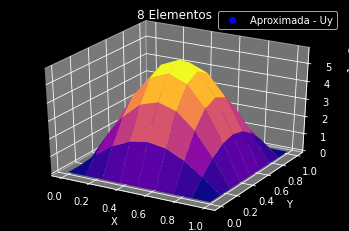

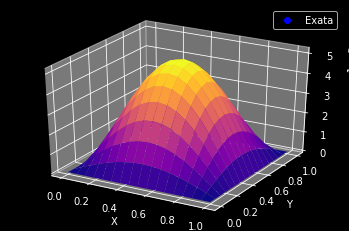

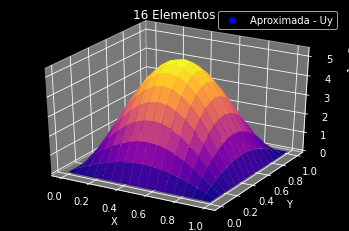

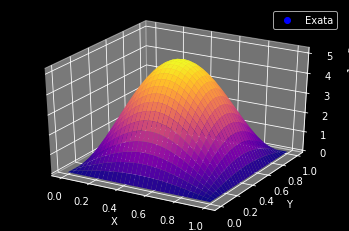

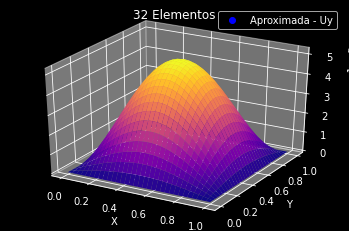

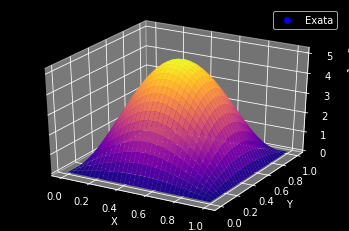

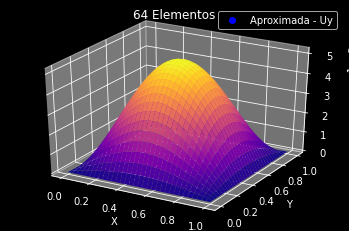

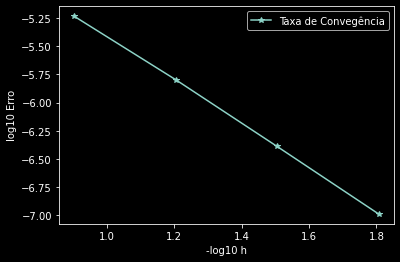

Erro:  [5.85859234e-06 1.59956629e-06 4.07541658e-07 1.02350707e-07]
Taxa de Convergência:  1.946320365793745


In [7]:
er = 4
erro = np.zeros(er)
refin = np.zeros(er)

for nelAtual in range(er):
  nel = 8*(2**(nelAtual))

  # dominio espacial
  xi = 0
  xf = 1
  # espaçamento entre os elementos
  h = (xf-xi)/nel
  h2 = h*h

  #dominio temporal
  ti = 0
  tf = 0.5
  #espaçamento temporal
  dt = h2

  #coeficiente difusivo
  eps = 1

  sigma = eps*dt/h2

  x = np.linspace(xi,xf,nel+1)
  y = np.linspace(xi,xf,nel+1)

  ux = np.zeros((nel+1,nel+1))
  uy = np.zeros((nel+1,nel+1))

  #condicao inicial
  for i in range(0,nel+1):
    for j in range(0,nel+1):
      uy[i,j] = exata(eps,ti,x[i],y[j])

  t = ti
  while(t < tf):

  #### PRIMEIRO PASSO ####
    t = t + dt/2
  #condicoes de contorno de Dirichlet
    ux[0,:] = exata(eps,t,x[0],y[:])
    ux[nel,:] = exata(eps,t,x[nel],y[:])
    ux[:,0] = exata(eps,t,x[:],y[0])
    ux[:,nel] = exata(eps,t,x[:],y[nel])
    for j in range(1,nel):
      #construcao da matriz
      a = - sigma*np.ones(nel-1)/2
      b = (1 + sigma)*np.ones(nel-1)
      c = - sigma*np.ones(nel-1)/2
      # construcao do vetor fonte 
      d = (1 - sigma)*uy[1:nel,j] + sigma/2*(uy[1:nel,j+1] + uy[1:nel,j-1])

      # contribuicao das condicoes de contorno no termo fonte 
      d[0] = d[0] + sigma/2*ux[0,j]
      d[nel-2] = d[nel-2] + sigma/2*ux[nel,j]

      ux[1:nel,j] = TDMASolve(a,b,c,d)

  #### SEGUNDO PASSO ####
    t = t + dt/2
  #condicoes de contorno de Dirichlet
    uy[0,:] = exata(eps,t,x[0],y[:])
    uy[nel,:] = exata(eps,t,x[nel],y[:])
    uy[:,0] = exata(eps,t,x[:],y[0])
    uy[:,nel] = exata(eps,t,x[:],y[nel])
    for i in range(1,nel):
      #construcao da matriz
      a = - sigma*np.ones(nel-1)/2
      b = (1 + sigma)*np.ones(nel-1)
      c = - sigma*np.ones(nel-1)/2
      # construcao do vetor fonte 
      d = (1 - sigma)*ux[i,1:nel] + sigma/2*(ux[i+1,1:nel] + ux[i-1,1:nel])

      # contribuicao das condicoes de contorno no termo fonte 
      d[0] = d[0] + sigma/2*uy[i,0]
      d[nel-2] = d[nel-2] + sigma/2*uy[i,nel]

      uy[i,1:nel] = TDMASolve(a,b,c,d)


  X,Y = np.meshgrid(x,y)
  zs = np.array( exata( eps,t,np.ravel(X), np.ravel(Y) ) )
  ZZ = zs.reshape(Y.shape)

  plt.style.use("dark_background")

  fig1 = plt.figure()
  ax1 = fig1.add_subplot(1,1,1, projection='3d')
  ax1.set_xlabel('X')
  ax1.set_ylabel('Y')
  surf1 = ax1.plot_surface(X, Y, ZZ, cmap = cm.plasma)

  fig2 = plt.figure()
  ax2 = fig2.add_subplot(1,1,1, projection='3d')
  ax2.set_xlabel('X')
  ax2.set_ylabel('Y')
  surf2 = ax2.plot_surface(X, Y, uy, cmap = cm.plasma, label='aproximada')

  fake2Dline = mpl.lines.Line2D([0],[0], linestyle="none", c='b', marker = 'o')
  ax1.legend([fake2Dline], ['Exata'], numpoints = 1)
  ax2.legend([fake2Dline], ['Aproximada - Uy'], numpoints = 1)
  plt.title('%i Elementos' %nel)
  plt.show()

  refin[nelAtual] = h
  erro[nelAtual] = np.max(np.max(np.abs(ZZ - uy)))

plt.plot(-np.log10(refin),np.log10(erro),'-*')
plt.legend(["Taxa de Convegência"])
plt.ylabel("log10 Erro")
plt.xlabel("-log10 h")
plt.show()
print("Erro: ", erro)
print("Taxa de Convergência: ", (np.log10(erro[er-1])-np.log10(erro[0]))/(np.log10(refin[er-1])-np.log10(refin[0])))

#Questão 2 - Convecção ADI

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
import matplotlib as mpl

In [9]:
def TDMASolve(a, b, c, d):
  nmax = len(d)#n em números é linhas

  # Modifica o primeiro coeficiente de cada linha
  c[0] /= b[0] #Risco de divisão por zero.
  d[0] /= b[0]

  for i in range(1, nmax):
    ptemp = b[i] - (a[i] * c[i-1])
    c[i] /= ptemp
    d[i] = (d[i] - a[i] * d[i-1])/ptemp

  #Substituição de volta
  x = [0 for i in range(nmax)]
  x[-1] = d[-1]
  for i in range(-2,-nmax-1,-1):
    x[i] = d[i] - c[i] * x[i+1]
  return x

In [10]:
def xbarra(t,x,y):
  return x*np.cos(4*t) + y*np.sin(4*t)
def ybarra(t,x,y):
  return -x*np.sin(4*t) + y*np.cos(4*t)

def exata(eps, gamma, t, x, y):
  xc = 0.2
  yc = 0
  gamma2 = gamma*gamma
  return (2*gamma2/(2*gamma2 + 4*eps*t) ) * np.exp( - ( (xbarra(t,x,y) - xc)**2 + (ybarra(t,x,y) - yc)**2 )/(2*gamma2 + 4*eps*t) )

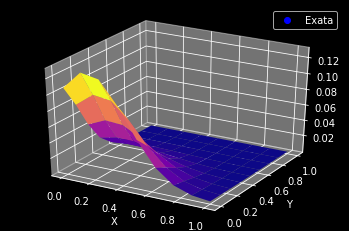

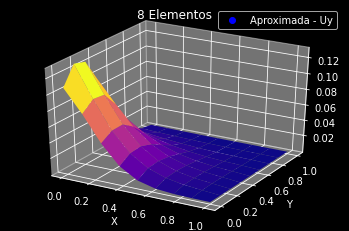

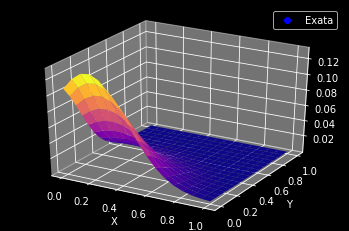

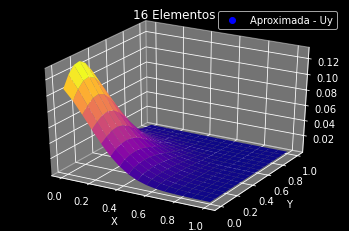

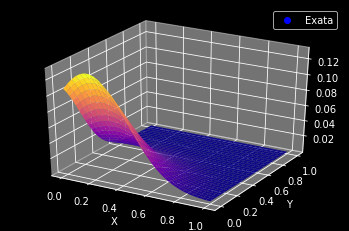

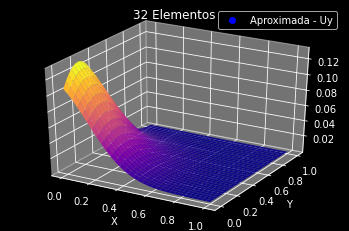

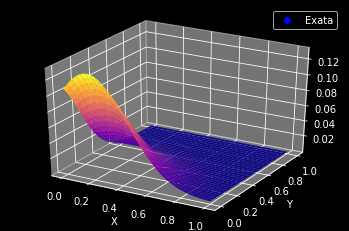

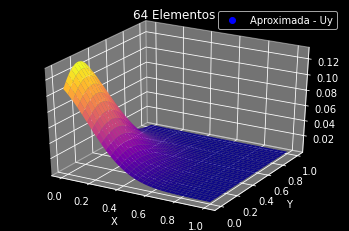

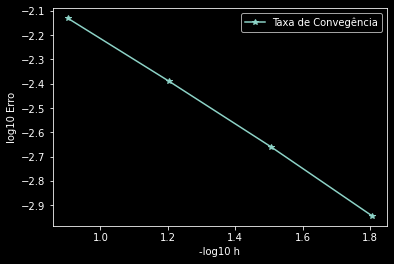

Erro:  [0.00739097 0.00406594 0.00219248 0.00113806]
Taxa de Convergência:  0.8997287799344892


In [11]:
er = 4
erro = np.zeros(er)
refin = np.zeros(er)

for nelAtual in range(er):
  nel = 8*(2**(nelAtual))

  # dominio espacial
  xi = 0
  xf = 1
  # espaçamento entre os elementos
  h = (xf-xi)/nel
  h2 = h*h

  #dominio temporal
  ti = 0
  tf = 3
  #espaçamento temporal
  dt = h

  #coeficiente difusivo
  eps = 0.01
  gamma = 0.1

  sigma = eps*dt/h2

  x = np.linspace(xi,xf,nel+1)
  y = np.linspace(xi,xf,nel+1)

  b1 = -4*y
  b2 = 4*x

  rho1 = b1*dt/h
  rho2 = b2*dt/h

  ux = np.zeros((nel+1,nel+1))
  uy = np.zeros((nel+1,nel+1))

  #condicao inicial
  for i in range(0,nel+1):
    for j in range(0,nel+1):
      uy[i,j] = exata(eps, gamma, ti,x[i],y[j])

  t = ti
  while(t < tf):

  #### PRIMEIRO PASSO ####
    t = t + dt/2
  #condicoes de contorno de Dirichlet
    ux[0,:] = exata(eps, gamma, t,x[0],y[:])
    ux[nel,:] = exata(eps, gamma, t,x[nel],y[:])
    ux[:,0] = exata(eps, gamma, t,x[:],y[0])
    ux[:,nel] = exata(eps, gamma, t,x[:],y[nel])

    for j in range(1,nel):

      #construcao da matriz
      if (b1[j] == 0):
        a = - sigma*np.ones(nel-1)/2
        b = (1 + sigma)*np.ones(nel-1)
        c = - sigma*np.ones(nel-1)/2
      if (b1[j] > 0):
        a = -(sigma + rho1[j])*np.ones(nel-1)/2
        b = (1 + sigma + rho1[j]/2)*np.ones(nel-1)
        c = - sigma*np.ones(nel-1)/2
      if (b1[j] < 0):
        a = - sigma*np.ones(nel-1)/2
        b = (1 + sigma - rho1[j]/2)*np.ones(nel-1)
        c = -(sigma - rho1[j])*np.ones(nel-1)/2

      # construcao do vetor fonte 
      if (b2[j] == 0):
        d = (1 - sigma)*uy[1:nel,j] + sigma/2*(uy[1:nel,j+1] + uy[1:nel,j-1])
      if (b2[j] > 0):
        d = (1 - sigma - rho2[1:nel]/2)*uy[1:nel,j] + sigma/2*(uy[1:nel,j+1]) + (sigma + rho2[1:nel])/2*(uy[1:nel,j-1])
      if (b2[j] < 0):
        d = (1 - sigma + rho2[1:nel]/2)*uy[1:nel,j] + (sigma - rho2[1:nel])/2*(uy[1:nel,j+1]) + sigma/2*(uy[1:nel,j-1])

      # contribuicao das condicoes de contorno no termo fonte 
      if(b1[j] == 0):
        d[0] = d[0] + sigma/2*ux[0,j]
        d[nel-2] = d[nel-2] + sigma/2*ux[nel,j]
      if(b1[j] > 0):
        d[0] = d[0] + (sigma + rho1[j])/2*ux[0,j]
        d[nel-2] = d[nel-2] + sigma/2*ux[nel,j]
      if(b1[j] < 0):
        d[0] = d[0] + sigma/2*ux[0,j]
        d[nel-2] = d[nel-2] + (sigma - rho1[j])/2*ux[nel,j]

      ux[1:nel,j] = TDMASolve(a,b,c,d)

  #### SEGUNDO PASSO ####
    t = t + dt/2
  #condicoes de contorno de Dirichlet
    uy[0,:] = exata(eps, gamma, t,x[0],y[:])
    uy[nel,:] = exata(eps, gamma, t,x[nel],y[:])
    uy[:,0] = exata(eps, gamma, t,x[:],y[0])
    uy[:,nel] = exata(eps, gamma, t,x[:],y[nel])

    for i in range(1,nel):

      #construcao da matriz
      if (b2[i] == 0):
        a = - sigma*np.ones(nel-1)/2
        b = (1 + sigma)*np.ones(nel-1)
        c = - sigma*np.ones(nel-1)/2
      if (b2[i] > 0):
        a = -(sigma + rho2[i])*np.ones(nel-1)/2
        b = (1 + sigma + rho2[i]/2)*np.ones(nel-1)
        c = - sigma*np.ones(nel-1)/2
      if (b2[i] < 0):     
        a = - sigma*np.ones(nel-1)/2
        b = (1 + sigma - rho2[i]/2)*np.ones(nel-1)
        c = -(sigma - rho2[i])*np.ones(nel-1)/2

      # construcao do vetor fonte 
      if (b1[i] == 0):
        d = (1 - sigma)*ux[i,1:nel] + sigma/2*(ux[i+1,1:nel] + ux[i-1,1:nel])
      if (b1[i] > 0):
        d = (1 - sigma - rho1[1:nel]/2)*ux[i,1:nel] + sigma/2*(ux[i+1,1:nel]) + (sigma + rho1[1:nel])/2*(ux[i-1,1:nel])
      if (b1[i] < 0):
        d = (1 - sigma + rho1[1:nel]/2)*ux[i,1:nel] + (sigma - rho1[1:nel])/2*(ux[i+1,1:nel]) + sigma/2*(ux[i-1,1:nel])

      if (b2[i] == 0):
        d[0] = d[0] + sigma/2*uy[i,0]
        d[nel-2] = d[nel-2] + sigma/2*uy[i,nel]
      if (b2[i] > 0):
        d[0] = d[0] + (sigma + rho2[i])/2*uy[i,0]
        d[nel-2] = d[nel-2] + sigma/2*uy[i,nel]
      if (b2[i] < 0): 
        d[0] = d[0] + sigma/2*uy[i,0]
        d[nel-2] = d[nel-2] + (sigma - rho2[i])/2*uy[i,nel]

      uy[i,1:nel] = TDMASolve(a,b,c,d)

  X,Y = np.meshgrid(x,y)
  zs = np.array( exata(eps,gamma,t,np.ravel(X), np.ravel(Y) ) )
  ZZ = zs.reshape(Y.shape)

  plt.style.use("dark_background")

  fig1 = plt.figure()
  ax1 = fig1.add_subplot(1,1,1, projection='3d')
  ax1.set_xlabel('X')
  ax1.set_ylabel('Y')
  surf1 = ax1.plot_surface(X, Y, ZZ, cmap = cm.plasma)

  fig2 = plt.figure()
  ax2 = fig2.add_subplot(1,1,1, projection='3d')
  ax2.set_xlabel('X')
  ax2.set_ylabel('Y')
  surf2 = ax2.plot_surface(X, Y, uy, cmap = cm.plasma, label='aproximada')

  fake2Dline = mpl.lines.Line2D([0],[0], linestyle="none", c='b', marker = 'o')
  ax1.legend([fake2Dline], ['Exata'], numpoints = 1)
  ax2.legend([fake2Dline], ['Aproximada - Uy'], numpoints = 1)
  plt.title('%i Elementos' %nel)
  plt.show()
  refin[nelAtual] = h
  erro_aux = np.zeros((nel+1, nel+1))
  for k in range(nel+1):
    for j in range(nel+1):
      erro_aux[k,j] = np.abs(exata(eps,gamma,t, x[k], y[j]) - uy[k,j])
  erro[nelAtual] = np.max(np.max(erro_aux))

plt.plot(-np.log10(refin),np.log10(erro),'-*')
plt.legend(["Taxa de Convegência"])
plt.ylabel("log10 Erro")
plt.xlabel("-log10 h")
plt.show()
print("Erro: ", erro)
print("Taxa de Convergência: ", (np.log10(erro[er-1])-np.log10(erro[0]))/(np.log10(refin[er-1])-np.log10(refin[0])))